# IPython basics: beyond plain Python

This short notebook will give you a quick taste of some of IPython's capabilities. IPython is the default "kernel" for most Jupyter installations (the kernel is the process that executes the code you type into notebook cells, and it's typically based on a single programming language). 

IPython started its life in 2001 as a terminal-based application that offered enhancements over the default Python interactive prompt. You can still use it that way, but here we'll use it through the notebook environment in JupyterLab.

The focus of IPython is on your Interactive experience, and its features are tailored to the typical workflow of everyday scientific computation and data analysis. In a nutshell, IPython is an interactive Python prompt that:

* Starts by being a strict superset of Python: any valid Python code should behave similarly, at most returning cosmetically improved representations of information, but not different results.

* Offers features to make it easy to run small code fragments (typed directly or as external scripts with the `%run` command) and iterate on their results. Variables from execution stay defined in the kernel and you can incrementally build the state of your analysis.

* Facilitates exploration of your Python environment with the `?` operator and a powerful and extensible tab-completion system.

* Provides direct access to the underlying operating system via a syntax that's not valid Python but is convenient to type: `!cmd arg1 arg2...` is executed by the underlying OS instead of as Python.

* Provides an extensible system of special commands known as "magics," that can perform all manner of transformations on their input, letting you do anything with user input ranging from defining one-off aliases for common operations, to blending multiple programming languages in a single session. Magic commands are marked by one or two `%` characters at their start.

This notebook is a small introduction to the features of IPython. Our [IPython in depth 
tutorial](https://github.com/ipython/ipython-in-depth) contains many more details on these topics and much more.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

## Discovering what you need within IPython itself

IPython tries to make it easy for you to discover things about all your Python tools, objects, variables and libraries (including IPython itself, obviously) with a few keystrokes, and while staying focused on the task at hand. The first key you will want to use is `?`, which can be summoned by itself:

### Asking for help with `?` 

In [ ]:
?

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [27]:
import collections
collections.namedtuple?

Signature:
collections.namedtuple(
    typename,
    field_names,
    *,
    rename=False,
    defaults=None,
    module=None,
)
Docstring:
Returns a new subclass of tuple with named fields.

>>> Point = namedtuple('Point', ['x', 'y'])
>>> Point.__doc__                   # docstring for the new class
'Point(x, y)'
>>> p = Point(11, y=22)             # instantiate with positional args or keywords
>>> p[0] + p[1]                     # indexable like a plain tuple
33
>>> x, y = p                        # unpack like a regular tuple
>>> x, y
(11, 22)
>>> p.x + p.y                       # fields also accessible by name
33
>>> d = p._asdict()                 # convert to a dictionary
>>> d['x']
11
>>> Point(**d)                      # convert from a dictionary
Point(x=11, y=22)
>>> p._replace(x=100)               # _replace() is like str.replace() but targets named fields
Point(x=100, y=22)
File:      ~/local/conda/lib/python3.9/collections/__init__.py
Type:      function


If you use _two_ `??` characters, IPython will attempt to dig deeper into the object and show you its source code, if available:

In [29]:
collections.Counter.most_common??

Signature: collections.Counter.most_common(self, n=None)
Source:   
    def most_common(self, n=None):
        '''List the n most common elements and their counts from the most
        common to the least.  If n is None, then list all element counts.

        >>> Counter('abracadabra').most_common(3)
        [('a', 5), ('b', 2), ('r', 2)]

        '''
        # Emulate Bag.sortedByCount from Smalltalk
        if n is None:
            return sorted(self.items(), key=_itemgetter(1), reverse=True)
        return _heapq.nlargest(n, self.items(), key=_itemgetter(1))
File:      ~/local/conda/lib/python3.9/collections/__init__.py
Type:      function


The `?` character can also be used in conjunction with a shell-like wildcard `*` as a _search_ tool to find names that match a substring in your variables (or the namespace of any library or object):

In [30]:
*int*?

FloatingPointError
breakpoint
int
print

### Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [ ]:
collections.

Before we move on, this command (whose special `%` syntax we explain below) gives you access to an IPython quick reference card:

In [ ]:
%quickref

## Accessing the underlying operating system

Any text prepended with a `!` is sent directly to the underlying OS:

In [1]:
!pwd

/Users/fperez/research/jupytearth/jupyter-earth/docs/interactive


and this syntax can be used in assignments, conveniently capturing command output into a Python variable you can then process further:

In [2]:
files = !ls
print("My current directory's files:")
print(files)

My current directory's files:
['ipython-beyond-python.ipynb']


Conversely, Python variables can be expanded when calling system commands. For simple values, `$var` expands the variable into its text form:

In [3]:
!echo $files

[ipython-beyond-python.ipynb]


and more complex expressions can be captured with `{expr}`:

In [4]:
!echo {files[0].upper()}

IPYTHON-BEYOND-PYTHON.IPYNB


Note that all this is available even in multiline blocks. While not as portable as pure Python code to do the same (it will only run in IPython and not as a regular Python script), it can be an extremely convenient way to weave together messy scripting logic that is quite common in data analysis activities:

In [5]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

00 - ipython-beyond-python


## Beyond Python: magic functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [ ]:
%magic

Line vs cell magics:

In [7]:
%timeit list(range(1000))

11 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%%timeit
list(range(10))
list(range(100))

1.01 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Like with `!cmd` above, you can capture the return value of any magic by assigning it. For example, with the `-o` flag, `%timeit` returns its output as a data structure in addition to printing the summary, so you can later do computations with it.

In [12]:
t = %timeit -o list(range(100))
t.best

786 ns ± 25.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


7.442348900003708e-07

In [11]:
t.best

7.325789290007379e-07

_Note:_ there is no generic mechanism for capturing the output of a cell magic into a variable, though you can work around this if needed by grabbing the `_` variable that automatically stores the last computed result after running a cell magic whose return value you may want.

Line magics can be used even inside code blocks:

In [26]:
for i in range(1, 5):
    size = i*100
    print('size:', size, end=' ')
    %timeit list(range(size))

size: 100 100000 loops, best of 3: 1.86 µs per loop
size: 200 100000 loops, best of 3: 2.49 µs per loop
size: 300 100000 loops, best of 3: 4.04 µs per loop
size: 400 100000 loops, best of 3: 6.21 µs per loop


Magics can do anything they want with their input, so it doesn't have to be valid Python. Note that the `bash` magic passes _all_ of its input unmodified to Bash, so `$var` isn't expanded assuming that `var` is a Python variable as `!cmd` does. This lets you paste unmodified Shell scripting code into a cell and you are guaranteed that it will run in a separate Bash process as if it was a script executed at the command line.

In [13]:
%%bash
echo "My shell is:" $SHELL
echo "My disk usage is:"
df -h

My shell is: /bin/bash
My disk usage is:
Filesystem                                                                 Size   Used  Avail Capacity  iused       ifree %iused  Mounted on
/dev/disk1s5s1                                                            1.8Ti   14Gi  432Gi     4%   553757 19538475003    0%   /
devfs                                                                     199Ki  199Ki    0Bi   100%      690           0  100%   /dev
/dev/disk1s4                                                              1.8Ti  1.0Gi  432Gi     1%        3 19539028757    0%   /System/Volumes/VM
/dev/disk1s2                                                              1.8Ti  281Mi  432Gi     1%      814 19539027946    0%   /System/Volumes/Preboot
/dev/disk1s6                                                              1.8Ti  264Ki  432Gi     1%       19 19539028741    0%   /System/Volumes/Update
/dev/disk1s1                                                              1.8Ti  1.4Ti  432Gi  

You can also capture stdout/err from these subprocesses into Python variables, instead of letting them go directly to stdout/err

In [23]:
%%bash
echo "hi, stdout"
echo "hello, stderr" >&2

hi, stdout


hello, stderr


In [24]:
%%bash --out output --err error
echo "hi, stdout"
echo "hello, stderr" >&2

In [25]:
print(error)
print(output)

hello, stderr

hi, stdout



Another interesting cell magic: create any file you want locally from the notebook:

In [14]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

And more...

Writing test.txt


In [15]:
!cat test.txt

This is a test file!
It can contain anything I want...

And more...


Most magic functions have help built into them which you can summon with the usual `?` operator:

In [18]:
%cd?

Docstring:
Change the current working directory.

This command automatically maintains an internal list of directories
you visit during your IPython session, in the variable _dh. The
command %dhist shows this history nicely formatted. You can also
do 'cd -<tab>' to see directory history conveniently.

Usage:

  cd 'dir': changes to directory 'dir'.

  cd -: changes to the last visited directory.

  cd -<n>: changes to the n-th directory in the directory history.

  cd --foo: change to directory that matches 'foo' in history

  cd -b <bookmark_name>: jump to a bookmark set by %bookmark
     (note: cd <bookmark_name> is enough if there is no
      directory <bookmark_name>, but a bookmark with the name exists.)
      'cd -b <tab>' allows you to tab-complete bookmark names.

Options:

-q: quiet.  Do not print the working directory after the cd command is
executed.  By default IPython's cd command does print this directory,
since the default prompts do not display path information.

Note t

The magic system is easily extensible, you can define your own magic functions with a few lines of code, [as explained in the documentation](https://ipython.readthedocs.io/en/stable/config/custommagics.html).

To close this section, let's see what other magics are currently defined in the system. You should explore these, as they can be quite useful in everyday work, and they can give you ideas for creating new ones to meet your own needs.

In [19]:
%lsmagic -h

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %cl  %clear  %colors  %conda  %config  %connect_info  %cp  %d  %dd  %debug  %dhist  %dirs  %dl  %doctest_mode  %dp  %dus  %dx  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%m

## Multi-language integration

Through the Magic system, IPython makes it possible to create rich integrations with other programming languages. Note that this is separate from the use of entirely separate _kernels_ for Jupyter itself, that are dedicated to executing code in other languages. Here we focus on making calls to other languages from within a mostly-Python, IPython-based session.  

We've already seen the use of `%%bash` above, and you may want to poke at the `%%script` magic if you'd like to run other arbitrary scripts.  Since this is meant to be a very brief intro we only show one more language integration here, with Fortran. But in [this example](https://nbviewer.jupyter.org/gist/fperez/5b49246af4e340c37549265a90894ce6/polyglot-ds.ipynb) you can see how to interleave within one single session others, including R, Julia and Cython.

To use the Fortran magic we load an extension we've previously installed:

In [34]:
%load_ext fortranmagic

And with this, we now can type arbitrary Fortran functions that will be compiled, linked and imported for us using the [`f2py`](https://numpy.org/doc/stable/f2py) tool that is central to the SciPy ecosystem:

In [35]:
%%fortran
subroutine sinx2(x, y, n)
    real, intent(in), dimension(n) :: x
    real, intent(out), dimension(n) :: y
    !intent(hide) :: n
    y = sin(x**2)
end subroutine sinx2

After running the above cell, we have a new function in Python called `sinx2` that computes $\sin(x^2)$ and that understands natively numpy arrays. It even has a docstring!

In [38]:
sinx2?

Call signature: sinx2(*args, **kwargs)
Type:           fortran
String form:    <fortran object>
Docstring:     
y = sinx2(x,[n])

Wrapper for ``sinx2``.

Parameters
----------
x : input rank-1 array('f') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(x)

Returns
-------
y : rank-1 array('f') with bounds (n)


We can now use it as any other Python function:

In [39]:
import matplotlib.pyplot as plt
import numpy as np

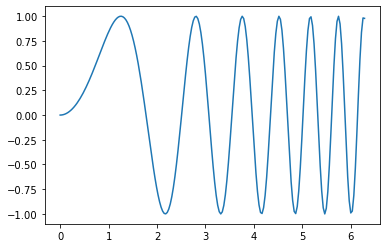

In [40]:
x = np.linspace(0, 2*np.pi, 200)
y = sinx2(x)
plt.plot(x, y);

## Rich object displays

In Python, objects can define how to display themselves both for print statements, via the special `__str__` method, and with a potentially richer representation with `__repr__`.  IPython takes this idea pretty far, allowing you to declare multiple display representations of your objects, that can include images, mathematical representations in LaTeX and arbitrarily rich HTML and JavaScript.

For example, the [SymPy library for symbolic computing](https://sympy.org) uses this system to display mathematical expressions:

In [44]:
from sympy import symbols, I, pi, exp, Rational

x, y = symbols("x y")
Rational(3,2)*pi + exp(I*x) / (x**2 + y)

3*pi/2 + exp(I*x)/(x**2 + y)

This is the system that Pandas takes advantage of to display datframes as a readable, HTML table:

In [48]:
import pandas as pd

pd.DataFrame(dict(x=[3,2,1], y=[10,20,30]))

,x,y
0,3,10
1,2,20
2,1,30


The [Xarray library](https://xarray.pydata.org/en/stable/examples/multidimensional-coords.html) makes particularly good use of this system, to provide very informative displays of datasets that describe the structure of the data immediately with a collapsible HTML view. Given the complexity of datasets frequently encountered in the geosciences and that Xarray can read, this can be a very useful feature when interactively exploring data:

In [51]:
import xarray as xr

xr.tutorial.open_dataset('rasm').load()

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

Again, we're only scratching the surface of these capabilities here - you can read more in the IPython docs and in the [IPython in depth tutorial](https://github.com/ipython/ipython-in-depth), particularly in the notebooks that illustrate the [rich output](https://nbviewer.jupyter.org/github/ipython/ipython-in-depth/blob/master/examples/IPython%20Kernel/Rich%20Output.ipynb) and [custom display logic](https://nbviewer.jupyter.org/github/ipython/ipython-in-depth/blob/master/examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb) that powers these capabilities.